# <span style="color: yellow; font-weight: bold;">Deep learning em visão computacional</span> 

Aula elaborada por Prof. Dr. Raphael Garcia Moreira, visite:
* [LinkedIn](https://www.linkedin.com/in/raphaelgarciamoreira/)
* [Lattes](http://lattes.cnpq.br/1166256332419016)

## <span style="color: yellow; font-weight: bold;">Estrutura da Aula:</span> 

### Parte I
* ##### DeepLearning no contexto da Inteligência Artificial
* ##### Quebra de paradigma causada pelo Machine Learning
* ##### O Neurônio de McCulloch-Pitts

### Parte II
* ##### Como as imagens são tratadas no contexto da visão computacional
* ##### Convolução
* ##### Pooling
* ##### Funções de Ativação
* ##### Pré-processamento
* ##### Resultados do treinamento
* ##### Resultados das camadas de Convolução e Pooling

### Parte III
* ##### Discussão sobre próximas aulas
* ##### Perguntas

## <span style="color: yellow; font-weight: bold;">Inteligência Artificial vs. Machine Learning vs. Deep Learning</span>

<p align="center">
  <img src="AI_ML_DL.png" alt="Inteligência Artificial, Machine Learning e Deep Learning" width="1200">
</p>

<center> 

[fonte: Singapore Computer Society](https://www.scs.org.sg/articles/machine-learning-vs-deep-learning) 
</center>
  
## <span style="color: yellow; font-weight: bold;">Programação tradicional versus Machine Learning</span>

<p align="center">
  <img src="TradProgram_Vs_ML.png" alt="Mudança de Paradigma" width="1200">
</p>

<center> 

[fonte: Microsoft](https://news.microsoft.com/wp-content/uploads/prod/sites/93/2020/04/Student-Guide-Module-2-Machine-Learning.pdf) 
</center>

## O poder de um único Neurônio Solitário

### Vamos utilizar:

* A biblioteca [TensorFlow](https://www.tensorflow.org/?hl=pt-br) que fornece uma variedade de APIs e recursos que permitem aos desenvolvedores criar modelos de ML de forma rápida e eficiente.
* A API de alto nível [Keras](https://www.tensorflow.org/guide/keras?hl=pt-br) do TensorFlow, que oferece uma interface simplificada e intuitiva para criar modelos de DL.
* A biblioteca [NumPy](https://numpy.org/) que oferece suporte para arrays multidimensionais (conhecidos como numpy arrays) e funções matemáticas para manipulação desses arrays.
* A biblioteca [Matplotlib](https://matplotlib.org/) que viabiliza a visualização de dados em Python, projetada para criar gráficos simples e avançados, gráficos estatísticos e visualizações interativas.

## Modelo matemático do neurônio MCP (McCulloch-Pitts)

<p align="center">
  <img src="Artificial_neural_model2.png" alt="Modelo de Neurônio MCP" width="1200">
</p>

<center> 

[Fonte: McCulloch-Pitts](https://link.springer.com/article/10.1007/BF02478259)
</center>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2023-11-12 15:16:30.514907: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 15:16:30.516087: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 15:16:30.539628: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 15:16:30.540205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 15:16:31.183950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

2.13.0


In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-12 15:16:42.507396: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-12 15:16:42.640338: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<span style="color: yellow; font-weight: bold;">model.compile():</span> Esta função é utilizada para configurar os aspectos do processo de treinamento antes de começar a treinar o modelo. É onde você define otimizador, função de perda e métricas de avaliação.

<span style="color: yellow; font-weight: bold;">optimizer='sgd':</span> Aqui, você especifica o otimizador que será usado durante o treinamento. "sgd" refere-se ao Gradiente Descendente Estocástico (Stochastic Gradient Descent). O otimizador é o algoritmo que ajusta os pesos do modelo durante o treinamento para minimizar a função de perda.

<span style="color: yellow; font-weight: bold;">loss='mean_squared_error':</span> Este parâmetro define a função de perda que será otimizada pelo otimizador. "mean_squared_error" refere-se à função de erro quadrático médio. Esta é uma função de perda comum para problemas de regressão, onde o objetivo é minimizar a diferença quadrática média entre as previsões do modelo e os valores reais.

In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

<span style="color: lightblue; font-weight: bold;">Discutir a questão chave: Data & Labels.</span>


In [4]:
xs = np.array([ -5.0,  0.0, 1.5, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-17.0, -2.0, 2.5, 4.0, 7.0, 10.0], dtype=float)

In [11]:
history_callback = model.fit(xs, ys, epochs=500)
loss_values = history_callback.history['loss']

Epoch 1/500
1/1 [==============================] - 0s 12ms/step - loss: 0.1455
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1403
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1353
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1304
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1258
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1213
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1170
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1128
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1087
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1049
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0975
Epoch 13/500
1/1 [==============================] - 0s 3ms/

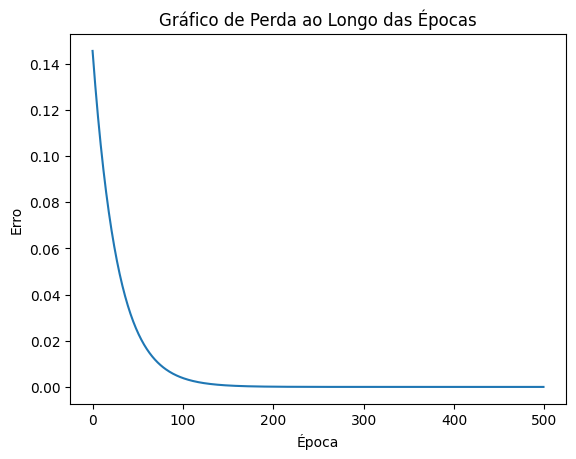

In [12]:
# Plotando o gráfico de perda
plt.plot(loss_values)
plt.title('Gráfico de Perda ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Erro')
#plt.yscale('log')  # Definindo escala logarítmica no eixo y
plt.show()

In [13]:
ValorTESTE = 10.0

print(f"O valor previsto é {model.predict([ValorTESTE]).item()}\n")
print(
    f"O valor previsto Arredondado é {round(model.predict([ValorTESTE]).item(), 2)}")

1/1 [==============================] - 0s 76ms/step
O valor previsto é 27.999996185302734

1/1 [==============================] - 0s 20ms/step
O valor previsto Arredondado é 28.0


In [14]:
weights, bias = model.get_weights()

print(
    f"O valor weight (coeficiente) 'A' que multiplica 'X' (entrada) é {weights.item()}\n O valor do bias (constante) {bias.item()}")

O valor weight (coeficiente) 'A' que multiplica 'X' (entrada) é 2.999994993209839
 O valor do bias (constante) -1.9999548196792603


In [15]:
Ytest = weights.item()*ValorTESTE + bias.item()

# Foi usado o round()
print(f"Valor de Ytest = a*x + b é igual a {round(Ytest, 2)}")

Valor de Ytest = a*x + b é igual a 28.0


<span style="color: lightblue; font-weight: bold;">Até aqui usamos um neurônio para aprender a partir de um par de poucos números...</span>

<span style="color: lightgreen; font-weight: bold;">E se trabalharmos por exemplo com 70.000 imagens que devem ser corretamente reconhecidas?</span>